In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [3]:
data=pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')

In [4]:
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [5]:
Labels=data['label']
data.drop('label',axis=1,inplace=True)

In [6]:
#To know the no of classes
Labels.unique()

array([2, 4, 3, 6, 5, 1, 0])

In [7]:
#To check the no of images in each class
Labels.value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

<BarContainer object of 7 artists>

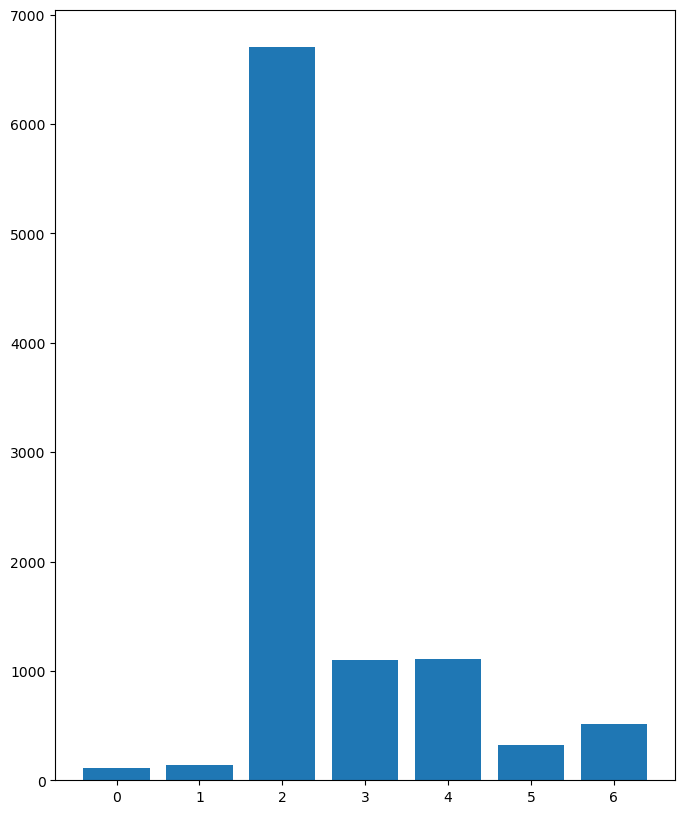

In [8]:
#Clearly the data is pretty imbalanced, to visualize the imbalance
import matplotlib.pyplot as plt
plt.figure(figsize = (8,10))
plt.bar(Labels.unique(), Labels.value_counts())

In [9]:
def Print_Random(data,x,Labels,shape):
    plt.figure(figsize=(28,28))
    for i in range(x):
        plt.subplot(7, 5, i + 1)
        k= np.random.randint(0,len(data)-1, 15)
        plt.imshow(np.array(data.iloc[k[i]]).reshape(shape,shape,3))
        img_label = Labels.iloc[k[i]]
        plt.title(img_label)
        plt.axis("off")
    plt.show()

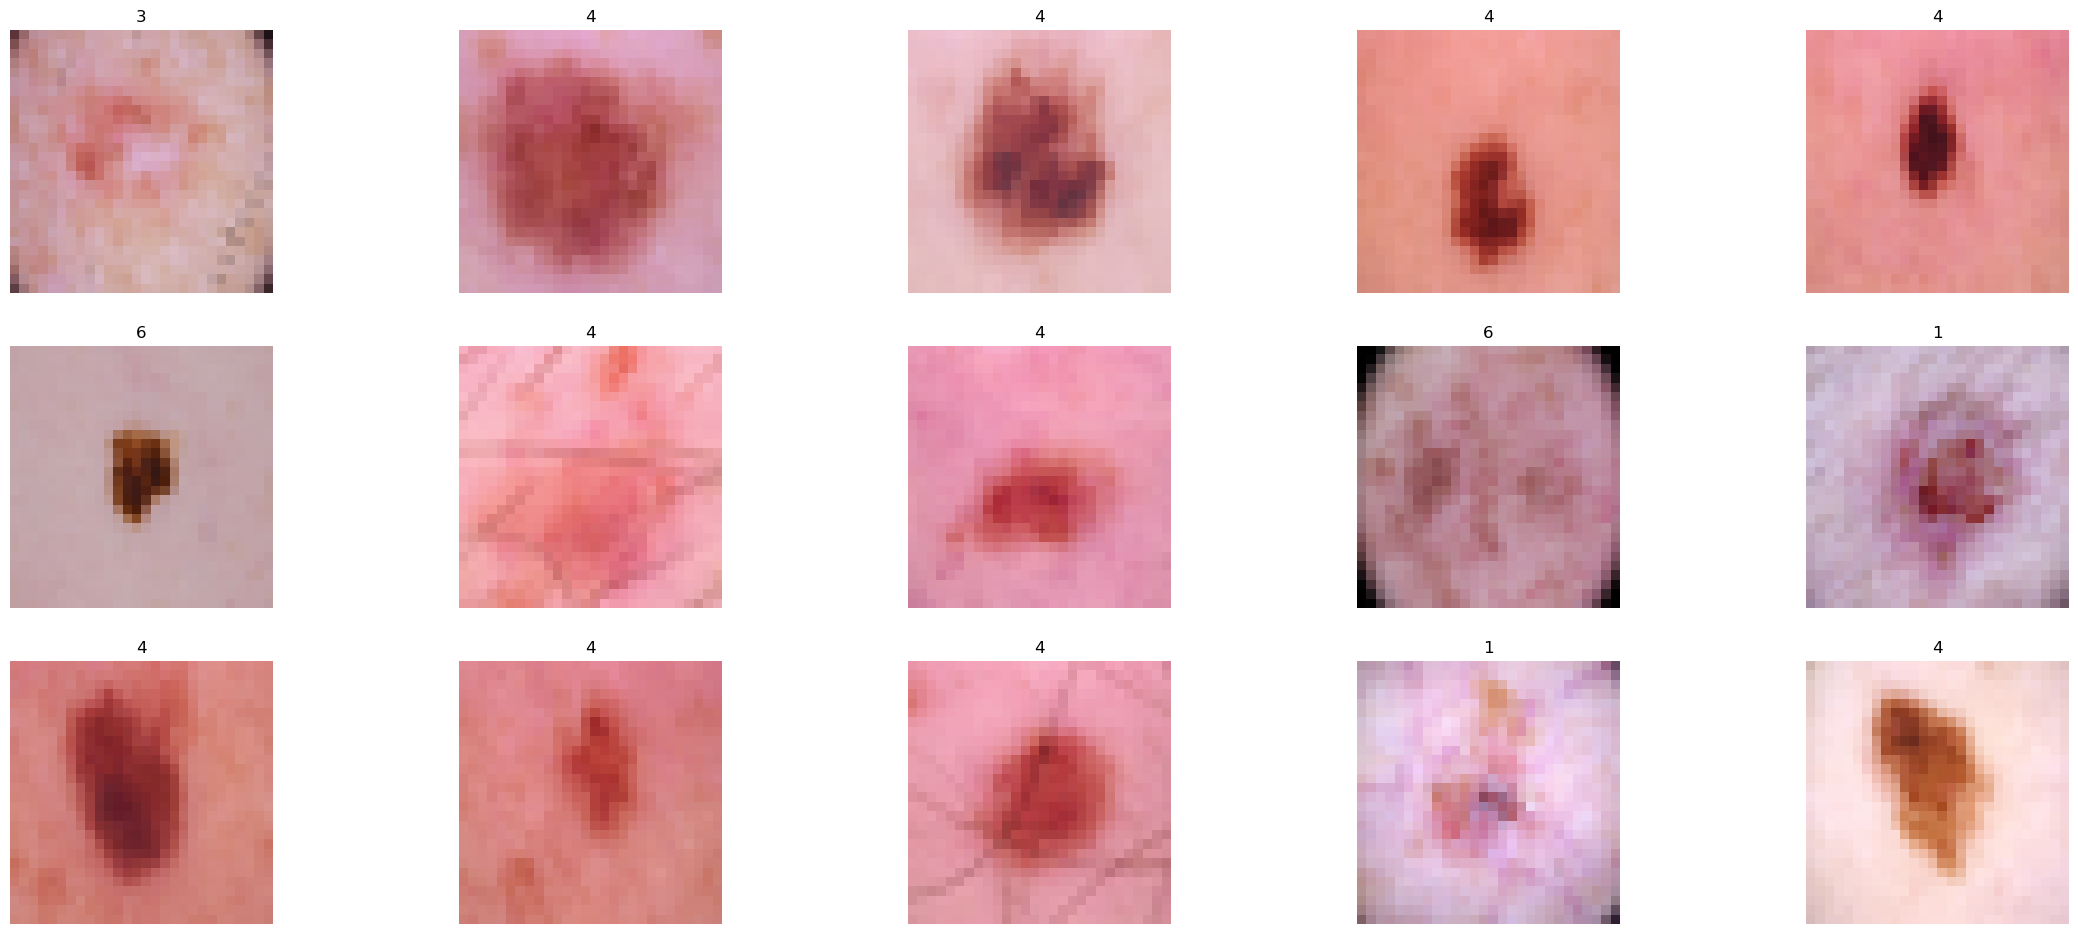

In [10]:
Print_Random(data,15,Labels,28)

When we had a look at those random images, we can understand that the dataset is pretty focused at the site of the infection rather than the skin around, so we can use SMOTE to balance the dataset.
Also the size of 28x28 is very small and the images are so not clear so let us rezise them to 256x256, so that we can use it for many novel CNNs as well.

In [11]:
import cv2

In [12]:
image_pixels=np.array(data.values.tolist())

In [13]:
"""
col=[]
for i in range(196608):
    col.append(i)
"""

'\ncol=[]\nfor i in range(196608):\n    col.append(i)\n'

In [14]:
"""
from skimage.transform import resize
original_size=(28,28,3)
new_size=(256,256,3)
resized_df=pd.DataFrame(columns=col)
for index,row in data.iterrows():
    image_pixels=row.values
    image=image_pixels.reshape(original_size)
    resized_image=resize(image,new_size,preserve_range=True)
    resized_row=resized_image.flatten()
    resized_df.loc[index]=resized_row
"""

'\nfrom skimage.transform import resize\noriginal_size=(28,28,3)\nnew_size=(256,256,3)\nresized_df=pd.DataFrame(columns=col)\nfor index,row in data.iterrows():\n    image_pixels=row.values\n    image=image_pixels.reshape(original_size)\n    resized_image=resize(image,new_size,preserve_range=True)\n    resized_row=resized_image.flatten()\n    resized_df.loc[index]=resized_row\n'

In [15]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,Labels,test_size=0.2,random_state=42)

In [16]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_smote,Y_smote=sm.fit_resample(X_train,Y_train)

In [17]:
Y_smote.value_counts()

4    5367
2    5367
0    5367
3    5367
6    5367
1    5367
5    5367
Name: label, dtype: int64

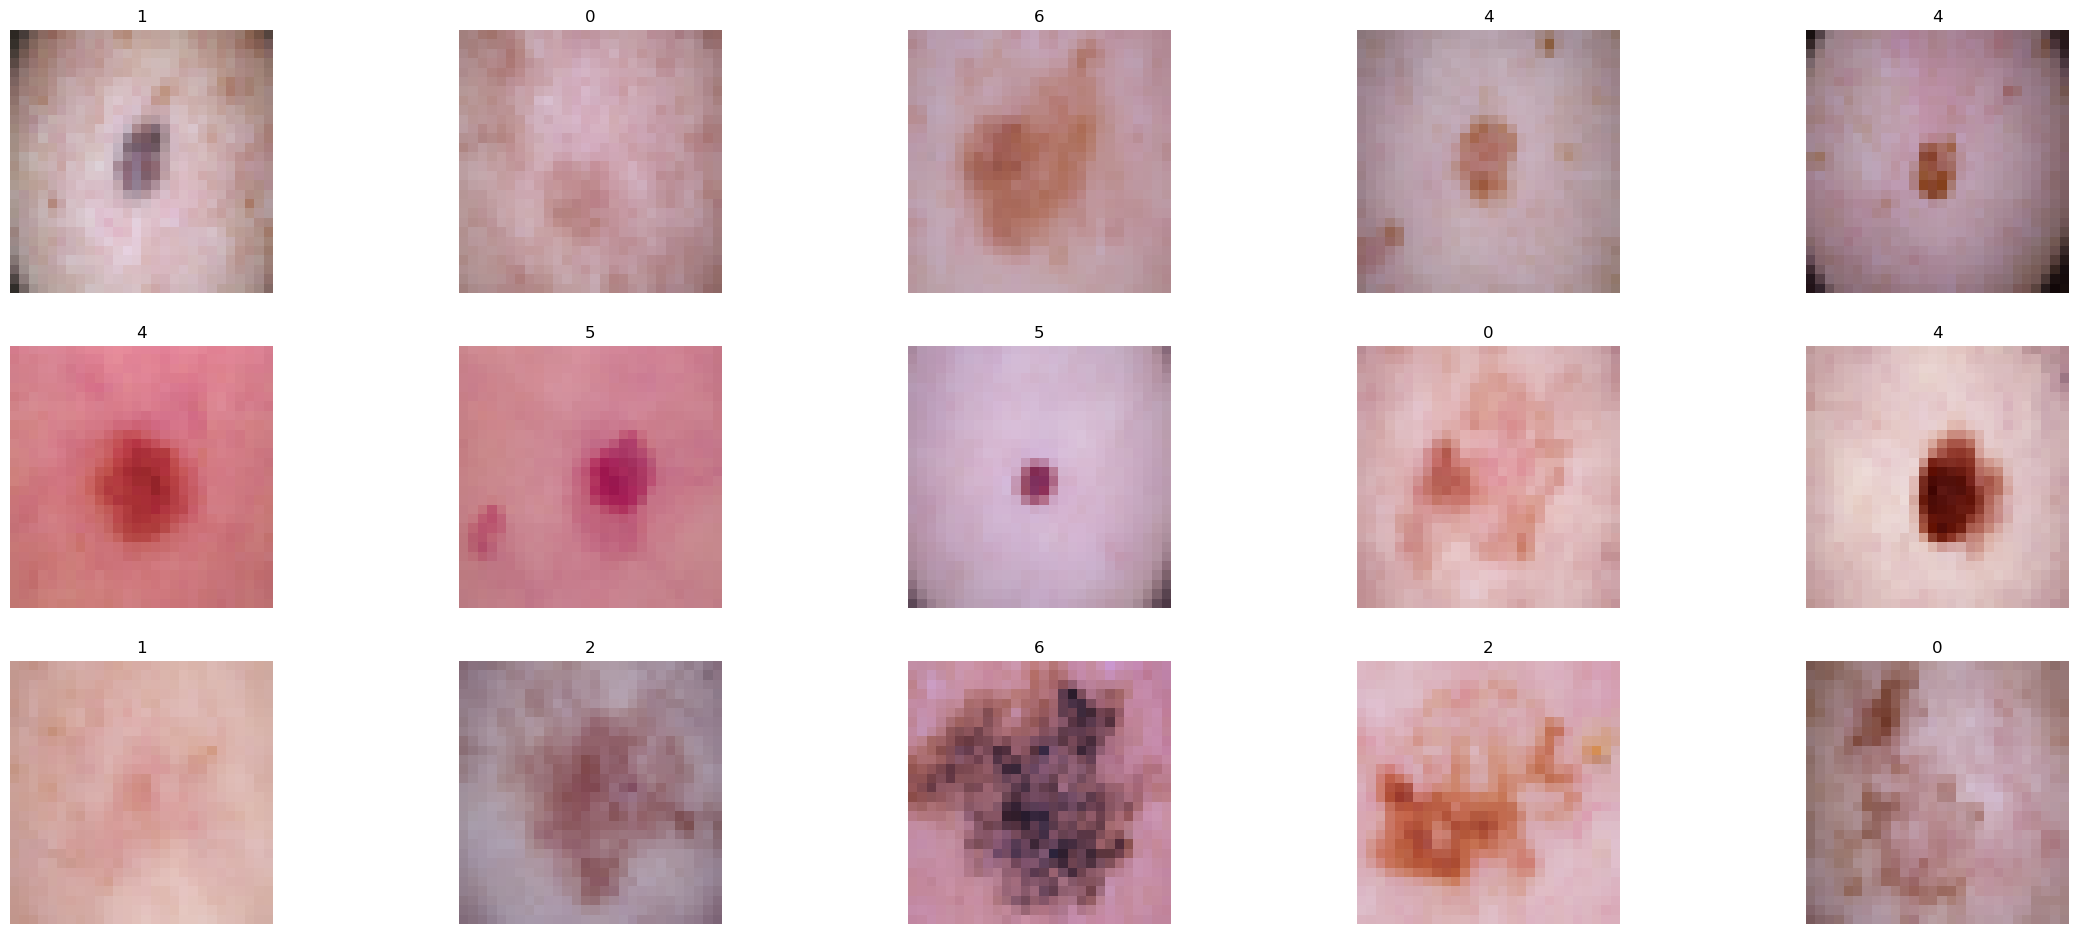

In [18]:
Print_Random(X_smote,15,Y_smote,28)

In [19]:
X_Tr=np.array(X_smote).reshape(len(X_smote),28,28,3)

In [41]:
X_test= np.array(X_test).reshape(len(X_test),28, 28, 3)

In [22]:
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [38]:
model= Sequential()
model.add(Conv2D(256, 3, input_shape = (28, 28, 3), activation = 'relu'))
# model.add(Conv2D(256, 3, activation = 'relu'))
#model.add(Conv2D(128, 3, activation= 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(BatchNormalization())
# model.add(Dropout(0.5))
model.add(Conv2D(128, 3, activation= 'relu'))
#model.add(Conv2D(128, 3, activation= 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Conv2D(64, 3, activation= 'relu'))
model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(Conv2D(64, 3, activation= 'relu'))
# model.add(BatchNormalization())
model.add(Conv2D(32, 3, activation= 'relu'))
# model.add(BatchNormalization())
model.add(Flatten())
# model.add(Dense(128, activation= 'relu'))
# model.add(Dropout(0.3))
model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(Labels.unique()), activation='softmax'))
model.summary()
model.compile(optimizer= 'adam', loss= keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 256)       7168      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 256)      0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Batc  (None, 13, 13, 256)      1024      
 hNormalization)                                                 
                                                                 
 conv2d_24 (Conv2D)          (None, 11, 11, 128)       295040    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                      

In [44]:
history= model.fit(X_Tr, Y_smote, epochs=25, batch_size= 32, validation_split=0.2,shuffle= True)

Epoch 1/25
940/940 [==============================] - 7s 7ms/step - loss: 0.2136 - accuracy: 0.9279 - val_loss: 1.3692 - val_accuracy: 0.4011
Epoch 2/25
940/940 [==============================] - 6s 7ms/step - loss: 0.2182 - accuracy: 0.9274 - val_loss: 1.1658 - val_accuracy: 0.3961
Epoch 3/25
940/940 [==============================] - 6s 7ms/step - loss: 0.2033 - accuracy: 0.9306 - val_loss: 1.2928 - val_accuracy: 0.4030
Epoch 4/25
940/940 [==============================] - 6s 7ms/step - loss: 0.2067 - accuracy: 0.9299 - val_loss: 0.9932 - val_accuracy: 0.4030
Epoch 5/25
940/940 [==============================] - 7s 7ms/step - loss: 0.1986 - accuracy: 0.9342 - val_loss: 1.1458 - val_accuracy: 0.3971
Epoch 6/25
940/940 [==============================] - 6s 7ms/step - loss: 0.2007 - accuracy: 0.9326 - val_loss: 2.9115 - val_accuracy: 0.2607
Epoch 7/25
940/940 [==============================] - 6s 7ms/step - loss: 0.1794 - accuracy: 0.9378 - val_loss: 1.0634 - val_accuracy: 0.4039
Epoch 

In [45]:
history_test= model.evaluate(X_test, Y_test)

63/63 [==============================] - 0s 3ms/step - loss: 1.5272 - accuracy: 0.7104


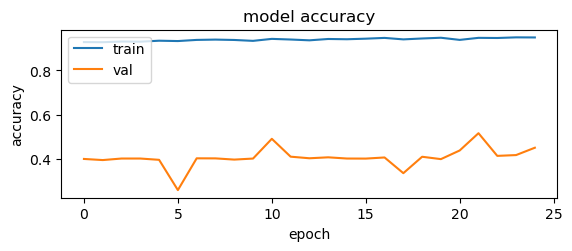

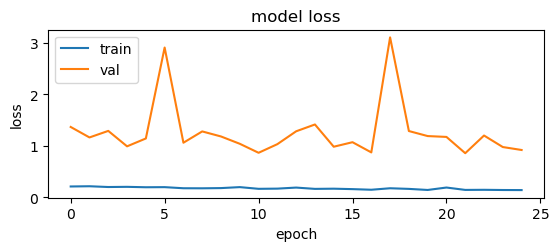

In [46]:
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [49]:
pred_probs = model.predict(X_test)
pred_classes = pred_probs.argmax(axis =1)
from sklearn.metrics import classification_report
print("Classification report\n",classification_report(Y_test,pred_classes))

63/63 [==============================] - 0s 2ms/step
Classification report
               precision    recall  f1-score   support

           0       0.25      0.33      0.28        69
           1       0.45      0.74      0.56        93
           2       0.46      0.48      0.47       228
           3       0.50      0.32      0.39        28
           4       0.82      0.87      0.85      1338
           5       0.52      0.67      0.58        21
           6       0.55      0.13      0.21       226

    accuracy                           0.71      2003
   macro avg       0.51      0.51      0.48      2003
weighted avg       0.71      0.71      0.69      2003



In [50]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mping
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

  # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
    plt.xticks(rotation=70, fontsize=text_size)
    plt.yticks(fontsize=text_size)
    threshold = (cm.max() + cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

  # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")

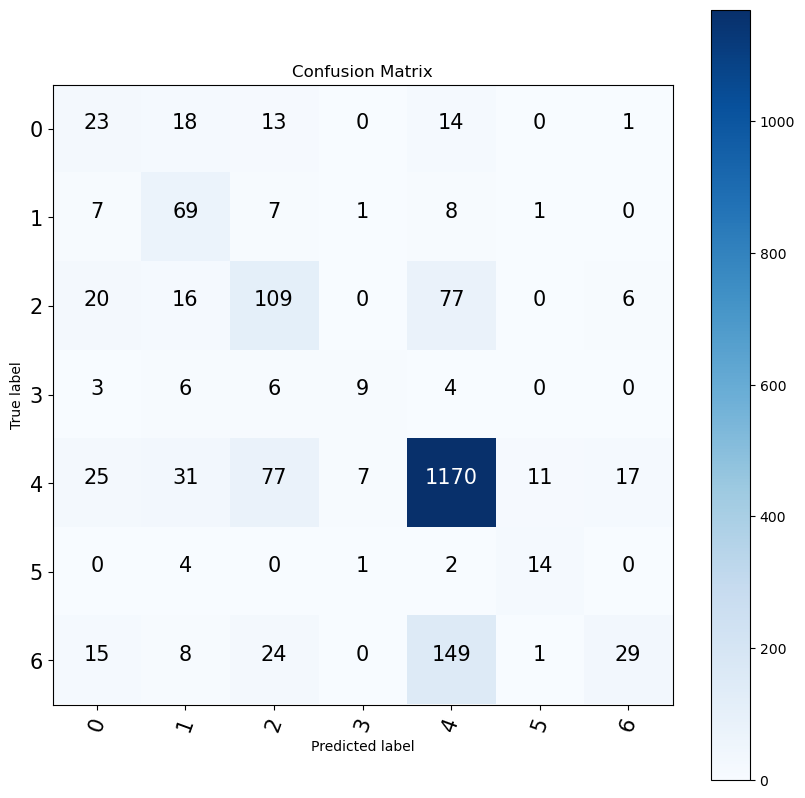

In [53]:
make_confusion_matrix(Y_test,pred_classes,figsize = (10,10))